In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import manifold

In [67]:
%matplotlib inline


In [2]:
import cPickle

## Load data

In [3]:
classifier = cPickle.load(open("model/classifier.pickle"))
rawtext = cPickle.load(open("model/textdata/rawtext.pickle"))
BoW = cPickle.load(open("model/BoW.pickle"))
BoW_transformer = cPickle.load(open("model/BoW_transformer.pickle"))

In [38]:
labeled_texts = [[party, text] for (party, texts) in rawtext.items() for text in texts]
df = pd.DataFrame(labeled_texts, columns=["party", "text"])
df

,party,text
0,linke,\r\n danke.  herr präsident! meine damen und...
1,linke,\r\n ich bin sofort fertig.  dabei hatte her...
2,linke,"\r\n ja, herr präsident, ich nehme die wahl g..."
3,linke,\r\n herr präsident! meine wortmeldung ist na...
4,linke,\r\n herr präsident! liebe kolleginnen und ko...
5,linke,"\r\n herr kollege silberhorn, sie nutzen ja, ..."
6,linke,\r\n frau präsidentin! auch von uns alle gute...
7,linke,"\r\n herr kollege oppermann, sie haben eben g..."
8,linke,"\r\n liebe kollegin haßelmann, die linke wäre..."
9,linke,"\r\n frau präsidentin, ich hatte bereits zu b..."


In [29]:
import sklearn
# find out how sklearn arranges feature vectors
c = sklearn.feature_extraction.text.CountVectorizer()
c.fit(['foo', 'bar']).transform(['foo', 'foo bar bar']).toarray()

array([[0, 1],
       [2, 1]])

In [30]:
c.get_feature_names()

[u'bar', u'foo']

In [40]:
df['tfidf'] = [v for (party, matrix) in BoW.items() for v in matrix.toarray()]
df

,party,text,tfidf
0,linke,\r\n danke.  herr präsident! meine damen und...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,linke,\r\n ich bin sofort fertig.  dabei hatte her...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,linke,"\r\n ja, herr präsident, ich nehme die wahl g...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,linke,\r\n herr präsident! meine wortmeldung ist na...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,linke,\r\n herr präsident! liebe kolleginnen und ko...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,linke,"\r\n herr kollege silberhorn, sie nutzen ja, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,linke,\r\n frau präsidentin! auch von uns alle gute...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,linke,"\r\n herr kollege oppermann, sie haben eben g...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,linke,"\r\n liebe kollegin haßelmann, die linke wäre...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,linke,"\r\n frau präsidentin, ich hatte bereits zu b...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


## Sample (for quicker computations)

In [104]:
rows = np.random.choice(df.index.values, 200)
df_sample = df.ix[rows].copy()
df_sample

,party,text,tfidf
1287,linke,\r\n frau prã¤sidentin! meine sehr verehrten ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9515,cdu,\r\n sehr geehrter herr prã¤sident! liebe kol...,"[0.0, 0.0226703239853, 0.0, 0.0, 0.01412458752..."
5112,spd,\r\n mit dem vorliegenden referentenentwurf b...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10244,cdu,\r\n frau prã¤sidentin! meine sehr verehrten ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6739,spd,"\r\nbitte, frau zimmermann.\r\n(jens spahn [cd...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2387,gruene,\r\n frau präsidentin! liebe kolleginnen und ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
10128,cdu,\r\n sehr geehrte frau prã¤sidentin! meine se...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8915,cdu,"\r\nja, sehr gerne.\r\nkatja keul","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7104,cdu,\r\n sehr geehrte frau präsidentin! liebe kol...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2404,gruene,\r\n herr präsident! meine sehr verehrten dam...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


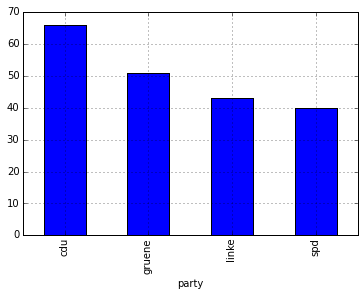

In [105]:
df_sample.groupby('party').count()['text'].plot(kind='bar')

## MDS

In [106]:
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
X_mds = clf.fit_transform(df_sample['tfidf'].tolist())
x, y = np.transpose(X_mds)
df_sample['mds_x'] = x
df_sample['mds_y'] = y

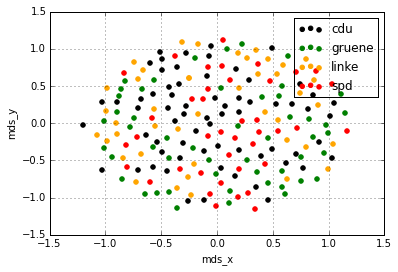

In [109]:
fig = None
colors = dict(spd='red', cdu='black', gruene='green', linke='orange')
for party, group in df_sample.groupby('party'):
    _fig = group.plot(kind='scatter', x='mds_x', y='mds_y', label=party, color=colors[party], ax=fig)
    fig = _fig


## t-SNE

In [110]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = clf.fit_transform(df_sample['tfidf'].tolist())
x, y = np.transpose(X_tsne)
df_sample['tsne_x'] = x
df_sample['tsne_y'] = y

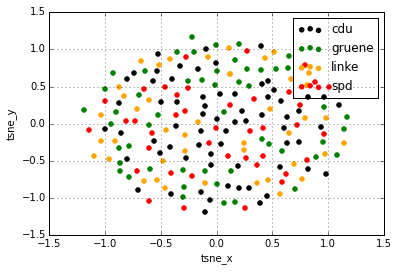

In [111]:
fig = None
colors = dict(spd='red', cdu='black', gruene='green', linke='orange')
for party, group in df_sample.groupby('party'):
    _fig = group.plot(kind='scatter', x='tsne_x', y='tsne_y', label=party, color=colors[party], ax=fig)
    fig = _fig

## PCA

In [114]:
X_pca = sklearn.decomposition.TruncatedSVD(n_components=2).fit_transform(df_sample['tfidf'].tolist())
x, y = np.transpose(X_pca)
df_sample['pca_x'] = x
df_sample['pca_y'] = y

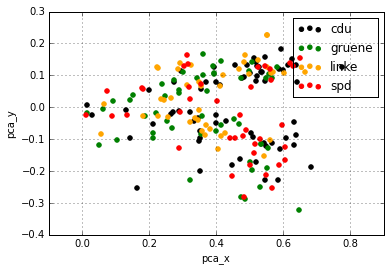

In [115]:
fig = None
colors = dict(spd='red', cdu='black', gruene='green', linke='orange')
for party, group in df_sample.groupby('party'):
    _fig = group.plot(kind='scatter', x='pca_x', y='pca_y', label=party, color=colors[party], ax=fig)
    fig = _fig